In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [16]:
url = "https://www.datacamp.com/community/tutorials"
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

pages = [i.text for i in soup.find_all('a') if 'community/tutorials?page=' in str(i)]
lastpage = pages[-1]

In [17]:
lastpage # 20 pages of tutorials determined to be scraped.

'20'

In [18]:
description=[]
upvote=[]
author=[]
publishdate=[]
title=[]

In [20]:
for cp in np.arange(1,int(lastpage)+1):
    url = "https://www.datacamp.com/community/tutorials?page=" + str(cp)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    description.append([i.text for i in soup.find_all(class_='jsx-379356511 blocText description')])
    upvote.append([i.text for i in soup.find_all(class_='jsx-4192737526 voted')])
    author.append([i.text for i in soup.find_all(class_='jsx-566588255 name')])
    publishdate.append([i.text for i in soup.find_all(class_='jsx-566588255 date')])
    title.append([i.text for i in soup.find_all(class_='jsx-379356511 blue')])
    time.sleep(3)
print ("Done!")

Done!


In [21]:
descriptionflat = [y for x in description for y in x]
upvoteflat = [y for x in upvote for y in x]
authorflat = [y for x in author for y in x]
publishdateflat = [y for x in publishdate for y in x]
titleflat = [y for x in title for y in x]
publishdateformatted = [datetime.strptime(re.sub('rd, ', ', ', re.sub('st, ', ', ', re.sub('nd, ', ', ', re.sub('th, ',', ',a)))), "%B %d, %Y") for a in publishdateflat]

In [30]:
cdata = {"author":authorflat,"publishdate":publishdateformatted,"title":titleflat,"description":descriptionflat,"upvote":upvoteflat}
df = pd.DataFrame(data = cdata)
df.to_csv("DataCamp_WebScrapingTutorial.csv", header=True, index=False)
df.head()

,author,publishdate,title,description,upvote
0,Francisco Javier Carrera Arias,2019-03-13,Data Wrangling with VLOOKUP in Spreadsheets,"In this tutorial, you will get an overview of ...",4
1,Sayak Paul,2019-03-12,SQLite in Python,"In this tutorial, you will learn about using S...",11
2,Karlijn Willems,2019-03-11,How to Make a Histogram with ggplot2,Learn how to make a histogram with ggplot2 in ...,13
3,Karlijn Willems,2019-03-08,How to Make a Histogram with Basic R,Tutorial for new R users whom need an accessib...,11
4,Ryan Sheehy,2019-03-07,Video: Intro to Python for Spreadsheet Users,"In this video tutorial, you'll watch the end-t...",18


In [26]:
df.shape # Almost 600 tutorials on DataCamp website as of Mar 19.

(594, 5)

In [27]:
datacamp = pd.read_csv("DataCamp_WebScrapingTutorial.csv", parse_dates=["publishdate"], infer_datetime_format=True)

In [31]:
datacamp['publishyymm'] = datacamp['publishdate'].dt.strftime("%Y-%b")
datacamp["posts"] = 1

In [32]:
datacamp.head()

,author,publishdate,title,description,upvote,publishyymm,posts
0,Francisco Javier Carrera Arias,2019-03-13,Data Wrangling with VLOOKUP in Spreadsheets,"In this tutorial, you will get an overview of ...",4,2019-Mar,1
1,Sayak Paul,2019-03-12,SQLite in Python,"In this tutorial, you will learn about using S...",11,2019-Mar,1
2,Karlijn Willems,2019-03-11,How to Make a Histogram with ggplot2,Learn how to make a histogram with ggplot2 in ...,13,2019-Mar,1
3,Karlijn Willems,2019-03-08,How to Make a Histogram with Basic R,Tutorial for new R users whom need an accessib...,11,2019-Mar,1
4,Ryan Sheehy,2019-03-07,Video: Intro to Python for Spreadsheet Users,"In this video tutorial, you'll watch the end-t...",18,2019-Mar,1


In [76]:
year = datacamp['publishdate'].dt.year
datacamp['publishyymm'] = pd.to_datetime(datacamp['publishyymm'])
month = datacamp['publishyymm'].dt.month

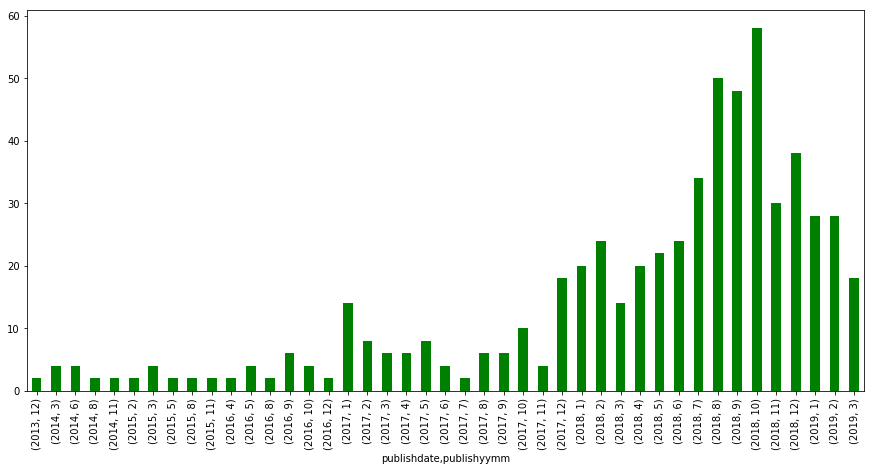

In [77]:
datacamp.groupby([year, month]).size().plot(kind='bar', figsize=(15,7), color='g')

### Let's just focus on the period starting from 2017

In [81]:
year = datacamp[datacamp['publishdate'] >= '2017-01-01']['publishdate'].dt.year

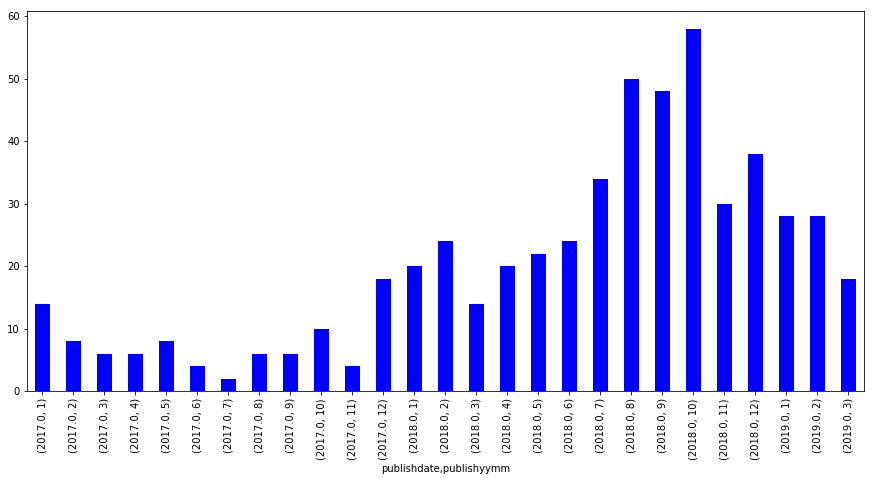

In [82]:
datacamp.groupby([year, month]).size().plot(kind='bar', figsize=(15,7), color='b')

In [83]:
datacamp.head(2)

,author,publishdate,title,description,upvote,publishyymm,posts
0,Francisco Javier Carrera Arias,2019-03-13,Data Wrangling with VLOOKUP in Spreadsheets,"In this tutorial, you will get an overview of ...",4,2019-03-01,1
1,Sayak Paul,2019-03-12,SQLite in Python,"In this tutorial, you will learn about using S...",11,2019-03-01,1


Text(0.5,0,'Number of Articles since 2017')

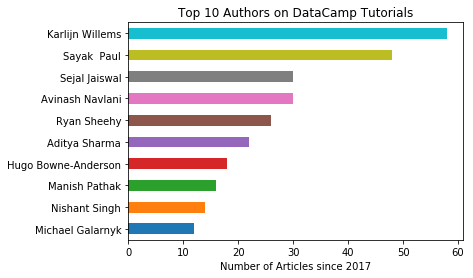

In [100]:
datacamp[datacamp['publishdate']>= '2017-01-01']['author'].value_counts(sort=True, ascending=True).tail(10).plot(kind='barh')

plt.title("Top 10 Authors on DataCamp Tutorials")
plt.xlabel("Number of Articles since 2017")